In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Topic 1:  the degree sequence 

True


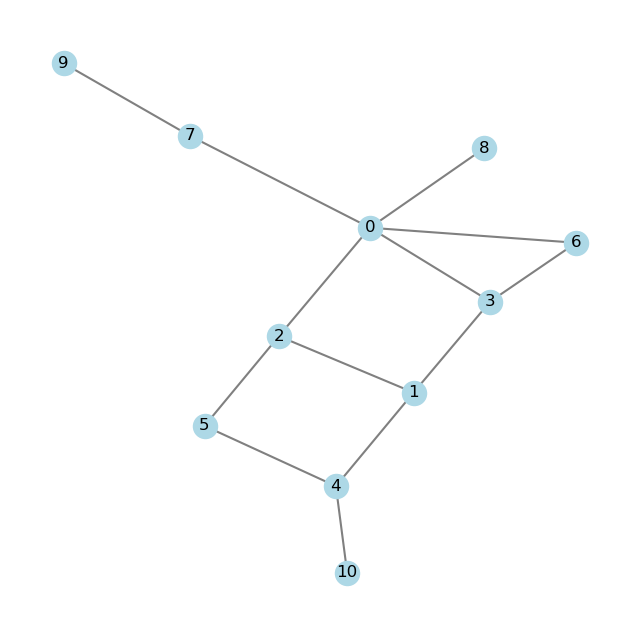

In [15]:
z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
print(nx.is_graphical(z)) # check if the node sequence is graphical

G = nx.configuration_model(
    z, seed=128, create_using=nx.Graph
)  # configuration model, seed for reproducibility

pos = nx.spring_layout(G, seed=128)  # Seed layout for reproducibility
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx(
    G,
    pos=pos,
    width=1.5,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=300,
)
ax.axis("off")  # remove the frame of the generated figure

plt.savefig(
    "/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/slides/week5/graphical.jpg",
    dpi=600,
    bbox_inches="tight",
)
plt.show()

In [16]:
unique, counts = np.unique(z, return_counts=True)

print(unique)

frequency = counts / len(G.nodes)
print(frequency)


[1 2 3 5]
[0.27272727 0.27272727 0.36363636 0.09090909]


The mean degree can be get by the expectation of node degrees. It also equals $2m/n$

In [17]:
k_1 = np.sum(np.dot(unique, frequency))
k_2 = (2*len(G.edges())) / (len(G.nodes()))

print(k_1)
print(k_2)

2.3636363636363633
2.3636363636363638


In [18]:
clustering_node = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print(f'node clustering coefficient: {clustering_node}')
print(f'graph average clustering coefficient: {average_clustering}')

node clustering coefficient: {0: 0.1, 1: 0, 2: 0, 3: 0.3333333333333333, 4: 0, 5: 0, 6: 1.0, 7: 0, 8: 0, 9: 0, 10: 0}
graph average clustering coefficient: 0.1303030303030303


In [19]:
edge_list = pd.read_csv('PTBR/musae_PTBR_edges.csv')
G = nx.from_pandas_edgelist(edge_list, source='from', target='to')
pos = nx.spring_layout(G)


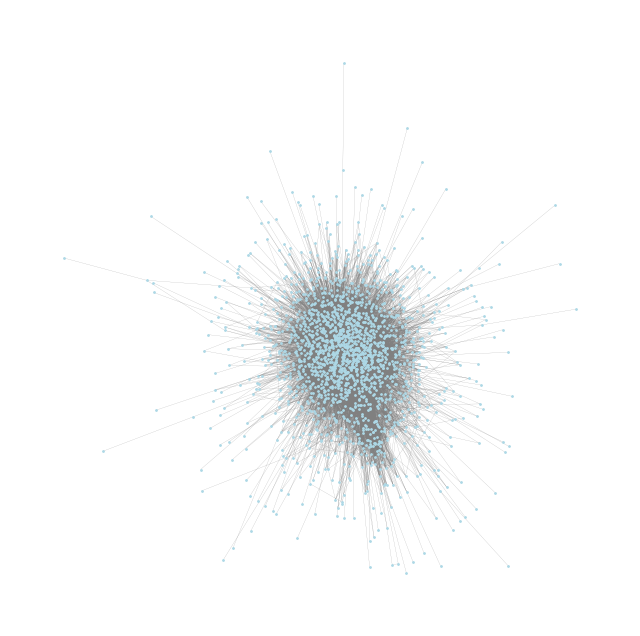

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx(
    G,
    pos=pos,
    width=0.1,
    with_labels=False,
    node_color="lightblue",
    edge_color="gray",
    node_size=1,
)
ax.axis("off")  # remove the frame of the generated figure

plt.savefig(
    "/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/slides/week5/social_network.jpg",
    dpi=600,
    bbox_inches="tight",
)
plt.show()

In [21]:
n = len(G.nodes())
m = len(G.edges())
k = 2*m / n
diam = nx.diameter(G)
l = nx.average_shortest_path_length(G)
clust = nx.average_clustering(G)
assort_co = nx.degree_assortativity_coefficient(G)

print(f'The number of nodes, edge, mean degree, diameter, average shortest path, clustering coefficient, and assortativity coefficient are:', n, m, k, diam, l, clust, assort_co, )

The number of nodes, edge, mean degree, diameter, average shortest path, clustering coefficient, and assortativity coefficient are: 1912 31299 32.73953974895397 7 2.5323791570055767 0.31989527466935147 -0.2324620970703897


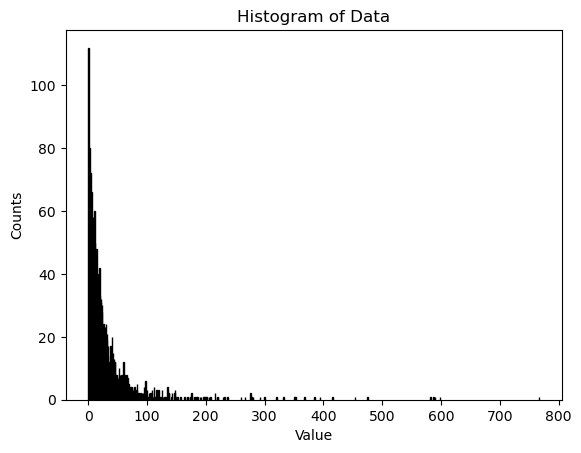

In [22]:
degree_list = [G.degree(node) for node in G.nodes()]
unique, counts = np.unique(degree_list, return_counts=True)

plt.bar(x=unique, height=counts, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.savefig("/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/slides/week5/social_historgram.jpg",    dpi=600,
    bbox_inches="tight",)
plt.show()